# **Final Project Task 5 - Census Modeling NN Regression**

Requirements

- Create a NN regression model on the Census dataset, with 'hours-per-week' target

- Model Selection and Setup:
    - Build a neural network model using a deep learning library like TensorFlow, Keras or PyTorch.
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - Train a simple NN model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable.
    - Feature Selection:
        - Neural Networks can learn feature importance automatically, so all relevant features should be included rather than manually selecting a subset.
        - Consider using embeddings for high-cardinality categorical features instead of one-hot encoding to improve efficiency.
    - Experimentation:
        - Focus on preprocessing techniques rather than manually selecting feature combinations. Ensure numerical features are normalized (e.g., MinMaxScaler, StandardScaler) and categorical features are properly encoded (e.g., one-hot encoding or embeddings for high-cardinality variables).
        - Experiment with different neural network architectures (e.g., number of layers, neurons per layer) and hyperparameters (e.g., activation functions, learning rates, dropout rates, and batch sizes).
        - Use techniques such as early stopping and learning rate scheduling to optimize model performance and prevent overfitting.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt    education  education-num  \
18700   20           Private  229414      HS-grad              9   
3474    43         Local-gov  108945    Bachelors             13   
18457   66  Self-emp-not-inc  182470  Prof-school             15   
13195   46      Self-emp-inc  181413   Assoc-acdm             12   
24975   57           Private  342906          9th              5   
10325   40           Private   77357  Prof-school             15   
13175   29           Private   31935      HS-grad              9   
10223   27  Self-emp-not-inc  243569      HS-grad              9   
18910   41           Private  428499         11th              7   
19919   58      Self-emp-inc  190763    Bachelors             13   

           marital-status         occupation   relationship   race     sex  \
18700       Never-married  Machine-op-inspct      Own-child  White  Female   
3474             Divorced     Prof-specialty      Unmarried  White  Female   
18457  Married-civ-spouse     Prof-specialty        Husband  White    Male   
13195  Married-civ-spouse    Exec-managerial           Wife  White  Female   
24975  Married-civ-spouse              Sales        Husband  Black    Male   
10325  Married-civ-spouse     Prof-specialty        Husband  White    Male   
13175            Divorced     Prof-specialty  Not-in-family  White  Female   
10223  Married-civ-spouse              Sales        Husband  White    Male   
18910  Married-civ-spouse       Craft-repair        Husband  White    Male   
19919  Married-civ-spouse     Prof-specialty        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
18700             0             0              30  United-States  <=50K  
3474              0             0              48  United-States  <=50K  
18457             0             0              25  United-States   >50K  
13195             0             0              40  United-States  <=50K  
24975             0             0              55  United-States   >50K  
10325             0             0              40  United-States   >50K  
13175             0             0              40  United-States  <=50K  
10223             0             0              40  United-States  <=50K  
18910             0          1485              50  United-States   >50K  
19919             0             0              40  United-States   >50K

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(input_shape):
    model = Sequential([
        Dense(64, activation="relu", input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
    return model

# Build the model
input_shape = X_train.shape[1]
model = build_model(input_shape)
model.summary()

c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,153 (35.75 KB)

 Trainable params: 9,153 (35.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 639.8210 - mae: 19.3502 - val_loss: 116.8093 - val_mae: 7.7158
Epoch 2/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - loss: 142.8621 - mae: 9.0036 - val_loss: 114.3738 - val_mae: 7.6129
Epoch 3/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - loss: 139.5358 - mae: 8.8474 - val_loss: 113.0504 - val_mae: 7.5456
Epoch 4/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 135.0518 - mae: 8.6955 - val_loss: 113.8942 - val_mae: 7.6819
Epoch 5/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 133.9550 - mae: 8.6643 - val_loss: 113.5031 - val_mae: 7.5271
Epoch 6/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - loss: 131.5515 - mae: 8.5243 - val_loss: 112.4617 - val_mae: 7.4881
Epoch 7/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - loss: 127.0060 - mae: 8.3595 - val_loss: 110.6786 - val_mae: 7.3806
Epoch 8/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - loss: 128.1828 - mae: 8.3636 - val_loss: 115.1001 - val_mae: 7.6035

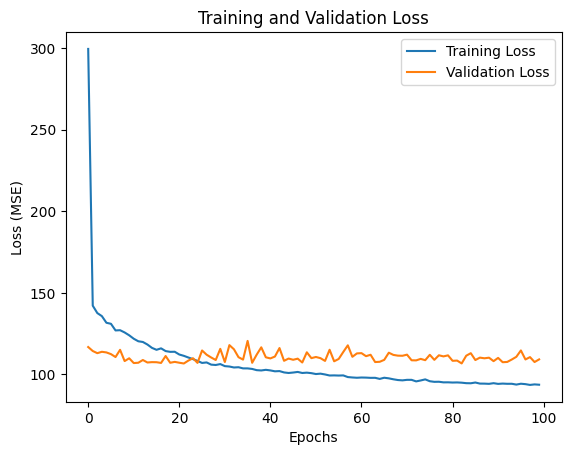

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [7]:
correlation_with_target = X_train.corrwith(y_train["hours-per-week"].squeeze())
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index

X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_val_poly = poly.transform(X_val_selected)
X_test_poly = poly.transform(X_test_selected)

In [14]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a function to build the model for keras_tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation="relu", input_shape=(X_train_poly.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss="mse", metrics=["mae"])
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='hours_per_week_regression'
)

# Perform the search
tuner.search(X_train_poly, y_train["hours-per-week"], epochs=50, validation_data=(X_val_poly, y_val["hours-per-week"]))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 57s]
val_loss: 117.03780746459961

Best val_loss So Far: 116.96072387695312
Total elapsed time: 00h 08m 55s


c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
# Train the best model
best_model.fit(X_train_poly, y_train["hours-per-week"], epochs=50, validation_data=(X_val_poly, y_val["hours-per-week"]))

# Evaluate on test set
y_test_pred = best_model.predict(X_test_poly)

# Define the evaluation function
def evaluate_model(y_true, y_pred):
	from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
	mae = mean_absolute_error(y_true, y_pred)
	mse = mean_squared_error(y_true, y_pred)
	rmse = mean_squared_error(y_true, y_pred, squared=False)
	r2 = r2_score(y_true, y_pred)
	return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

test_results = evaluate_model(y_test["hours-per-week"], y_test_pred)
print(test_results)

Epoch 1/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - loss: 119.3484 - mae: 7.6444 - val_loss: 117.9373 - val_mae: 7.3996
Epoch 2/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 119.6584 - mae: 7.6288 - val_loss: 118.2331 - val_mae: 7.6744
Epoch 3/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - loss: 119.2492 - mae: 7.5890 - val_loss: 117.8981 - val_mae: 7.6168
Epoch 4/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - loss: 116.3553 - mae: 7.5420 - val_loss: 116.9304 - val_mae: 7.4471
Epoch 5/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - loss: 116.0117 - mae: 7.5450 - val_loss: 118.7792 - val_mae: 7.6432
Epoch 6/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - loss: 116.5014 - mae: 7.5083 - val_loss: 117.3532 - val_mae: 7.4151
Epoch 7/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - loss: 117.5273 - mae: 7.5432 - val_loss: 117.5045 - val_mae: 7.5208
Epoch 8/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - loss: 117.9517 - mae: 7.5455 - val_loss: 117.3074 - val_mae: 7.5385
Epoch 9/

TypeError: got an unexpected keyword argument 'squared'